In [6]:
import numpy as np
import sys
from IPython.core.pylabtools import figsize

sys.path.append('../')
from tools.img import tensor2ndarray, ndarray2tensor, idct_2d_3c_slide_window
from torchvision.transforms.transforms import ToTensor, Resize, Compose
from tools.img import dct_2d_3c_full_scale
from tools.img import dwt_2d_3c, idwt_2d_3c
from tools.img import dct_2d_3c_slide_window, idct_2d_3c_slide_window
from PIL import Image
import PIL
import torch
from tools.img import clip
import matplotlib.pyplot as plt
import math

torch.manual_seed(42)

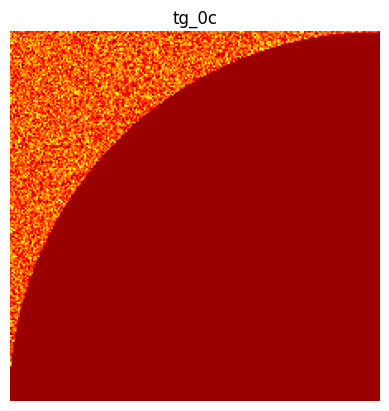

In [7]:
def function_y(x, r):
    return r - math.sqrt(math.pow(r, 2) - math.pow(x - r, 2))


scale = 224
tg_0c = np.zeros((scale, scale), dtype=np.float32) + np.random.randn()
for i in range(0, scale, 1):
    J = int(function_y(i, scale ))
    for j in range(J):
        tg_0c[i, j] = 4.5 + np.random.randn()

_, ax = plt.subplots(1, 1)
ax.imshow(tg_0c, cmap='hot')
ax.set_title('tg_0c')
ax.axis('off')

plt.show()

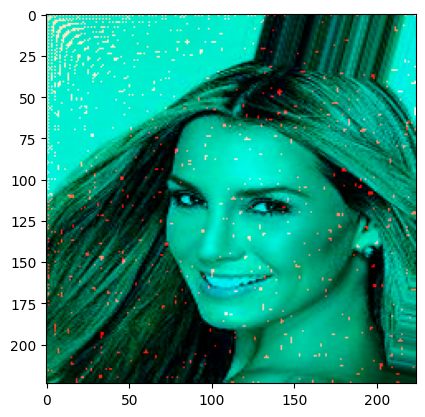

In [8]:
tg = Image.open('../resource/example/000001.jpg')
tg = tg.resize(size=(scale, scale))
tg = np.array(tg)
tg_dct = dct_2d_3c_slide_window(tg.astype(float), scale)
tg_dct[:, :, 0] = tg_0c
tg_re = idct_2d_3c_slide_window(tg_dct.astype(float), scale).astype(np.uint8)
plt.imshow(tg_re, cmap='hot')

PIL.Image.Image.save(Image.fromarray(tg_re), f'../resource/DUBA/{scale}.png')